<a href="https://colab.research.google.com/github/adarshkumaryadav421-prog/test-repo/blob/main/C1_W1_Lab_2_linear_systems_as_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representing Systems of Equations as Matrices

By completing this lab, you will be able to use basic programming skills with Python and the [`NumPy`](https://numpy.org/doc/stable/index.html) package to represent systems of linear equations as matrices. In this notebook, you will:

- Use the [`NumPy`](https://numpy.org/doc/stable/index.html) linear algebra package to model systems of linear equations as matrices.
- Evaluate the determinant of the matrix and examine the relationship between matrix singularity and the number of solutions of the linear system.

# Table of Contents

- [ 1 - Representing and Solving System of Linear Equations using Matrices](#1)
  - [ 1.1 - System of Linear Equations](#1.1)
  - [ 1.2 - Systems of Linear Equations using Matrices](#1.2)
  - [ 1.3 - Evaluating Determinant of a Matrix](#1.3)
- [ 2 - Visualizing 2x2 Systems as Plotlines](#2)
  - [ 2.1 - Elimination Method](#2.1)
  - [ 2.2 - Graphical Representation of the Solution](#2.2)
- [ 3 - System of Linear Equations with No Solutions](#3)
- [ 4 - System of Linear Equations with Infinite Number of Solutions](#4)

## Packages

Load the `NumPy` package to access its functions. Additionally, load the `matplotlib.pyplot` package, which you will use for creating the plots.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plot_lines function directly since utils module isn't available
def plot_lines(x_data, y_data, labels=None, colors=None, title="Line Plot",
               xlabel="X", ylabel="Y", figsize=(10, 6)):
    """
    Plot multiple lines on the same figure

    Parameters:
    - x_data: array or list of x values, or list of arrays for multiple lines
    - y_data: array or list of y values, or list of arrays for multiple lines
    - labels: list of labels for each line (optional)
    - colors: list of colors for each line (optional)
    - title: plot title
    - xlabel: x-axis label
    - ylabel: y-axis label
    - figsize: figure size tuple
    """
    plt.figure(figsize=figsize)

    # Handle single line case
    if not isinstance(y_data[0], (list, np.ndarray)) or len(np.array(y_data).shape) == 1:
        plt.plot(x_data, y_data, label=labels[0] if labels else None,
                color=colors[0] if colors else None)
    else:
        # Handle multiple lines
        for i, (x, y) in enumerate(zip(x_data, y_data)):
            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            plt.plot(x, y, label=label, color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if labels:
        plt.legend()

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

<a name='1'></a>
## 1 - Representing System of Linear Equations using Matrices

<a name='1.1'></a>
### 1.1 - System of Linear Equations

A **system of linear equations** (or **linear system**) is a collection of one or more linear equations involving the same variables. For example:


$$
\begin{cases}
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}
$$

is a system of two equations with two unknown variables $x_1$ and $x_2$. **To solve** a system of linear equations means to find values for the variables $x_1$ and $x_2$ such that all of its equations are simultaneously satisfied.

A linear system is **singular** if it has no unique solution, and otherwise, it is said to be **non-singular**.

<a name='1.2'></a>
### 1.2 - System of Linear Equations as Matrices
In the lecture, you saw that we represented linear systems of equations as matrices. The system $(1)$ represented as a matrix is as follows:

$$
\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix}
$$

Each row represents an equation in the system. The first column represents the coefficients of $x_1$ in the system, the second column represents the coefficients of $x_2$, and the third column represents the constant values on the right side of the equals signs in the equations.

We could further choose to represent the coefficients of the system $(1)$ as its own matrix $A$ as follows:

$$
\begin{bmatrix}
-1 & 3\\
3 & 2
\end{bmatrix}
$$

and the outputs of the system as a vector $b$ like this:

$$
\begin{bmatrix}
7 \\
1
\end{bmatrix}
$$

We show the matrix $A$ and vector $b$ in `NumPy` below:

In [3]:
A = np.array([
        [-1, 3],
        [3, 2]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[-1.  3.]
 [ 3.  2.]]

Array b:
[7. 1.]


What are the dimensions of matrix $A$ and vector $b$?

You can confirm the dimensions of $A$ and $b$ using the `shape` attribute (you can also use `np.shape()` as an alternative).

In [4]:
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

# print(f"Shape of A: {np.shape(A)}")
# print(f"Shape of A: {np.shape(b)}")

Shape of A: (2, 2)
Shape of b: (2,)


In the lectures, you manually solved some simple linear systems with two equations. However, you have yet to formalize the approach to solving systems of linear equations. In this lab, we use a handy function to solve the equations.

The `NumPy` linear algebra package provides a quick and reliable way to solve systems of linear equations using the function `np.linalg.solve(A, b)`. Here, $A$ is a matrix, as you've seen previously, where each row represents one equation in the system, and each column corresponds to the variables $x_1$ and $x_2$. $b$ is a 1-D array of the free (right side) coefficients. More information about the `np.linalg.solve()` function can be found in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

To find the solution of the system $(1)$, we will simply use the `np.linalg.solve(A, b)` function. The result will be saved in the 1-D array $x$, where the elements correspond to the values of $x_1$ and $x_2$:

In [5]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [-1.  2.]


The first column in this output is the solution to the variable $x_1$, and the second column is the solution to the variable $x_2$. Confirm that the solution is correct by substituting these values of $x_1$ and $x_2$ into the original system of equations.

<a name='1.3'></a>
### 1.3 - Evaluating Determinant of a Matrix

The matrix $A$ corresponding to the linear system $(1)$ is a **square matrix** - it has the same number of rows and columns. In the case of a square matrix, it is possible to calculate its determinant - a real number which characterizes some properties of the matrix. A linear system containing two (or more) equations with the same number of unknown variables will have one solution if and only if matrix $A$ has a non-zero determinant.

In this course, it's useful to calculate properties like the determinant by hand to develop an intuition for how it is calculated, but these calculations are also easily done by a computer.

Let's calculate the determinant using the `NumPy` linear algebra package. You can do it with the `np.linalg.det(A)` function. More information about it can be found in [the official documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html).

In [6]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


Note that its value is non-zero, as expected for a system with exactly one solution.

<a name='2'></a>
## 2 - Visualizing 2x2 Systems as Plotlines

You can see how easy it is to use contemporary packages to solve linear equations and calculate useful properties of matrices like the determinant. In this section, we will visualize a 2x2 system as plot lines, as you saw in the ungraded plugin.

<a name='2.1'></a>
### 2.1 - Representation of the system as a matrix

Before you visualize the system $(1)$, you would want to represent the system in a matrix with the form:

$$
\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix}
$$

To do this, you can either create a new matrix with these values or horizontally stack the $A$ and $b$ matrices you created earlier. Note that the `np.hstack()` function will require you to reshape array $b$ before it is stacked, as its current shape is $(2,)$. The code below includes the `.reshape((2, 1))` command to allow the horizontal stack to be completed.

In [8]:
A_system = np.hstack((A, b.reshape((2, 1))))

print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


Let's review how to extract a row of a matrix, which will help later in performing the required operations with the rows. Remember that indexing of arrays in Python starts from zero, so to extract the second row of a matrix, you need to use the following code:

In [9]:
print(A_system[1])

[3. 2. 1.]


<a name='2.2'></a>
### 2.2 - Graphical Representation of the Solution

A linear equation in two variables (here, $x_1$ and $x_2$) can be represented geometrically by a line in the plane. This is called the **graph of the linear equation**. In the case of the system of two equations, there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.

In the following code, you will define a function `plot_lines()` to plot the lines and use it later to represent the solution which you found earlier. Do not worry if the code in the following cell is not clear - at this stage, it is not important to understand.

plot_lines(A_system)

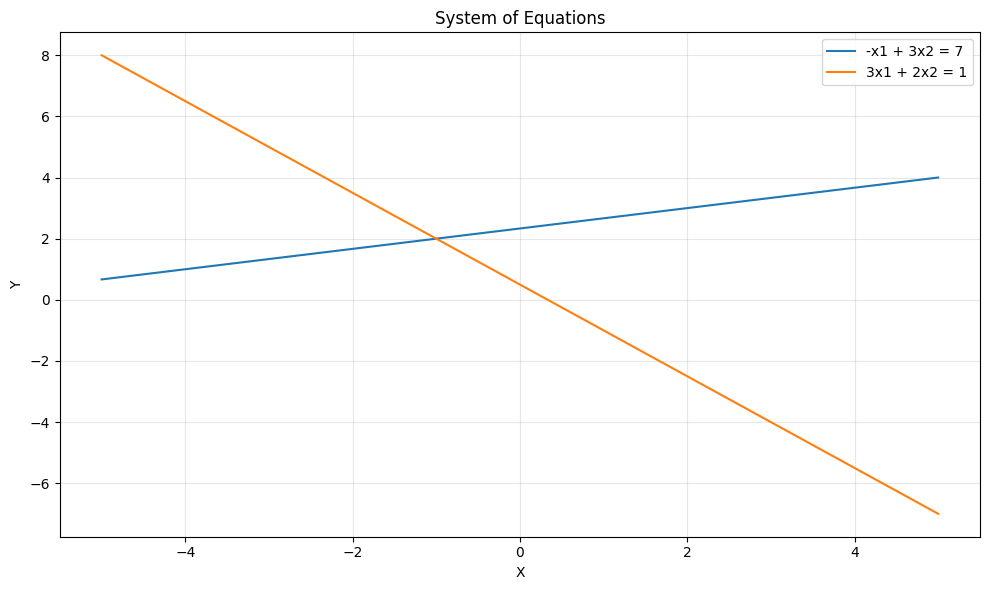

In [15]:
# Extract coefficients and constants from A_system
eq1_coeffs = A_system[0, :2]
eq1_const = A_system[0, 2]
eq2_coeffs = A_system[1, :2]
eq2_const = A_system[1, 2]

# Define a range of x values for plotting
x_values = np.linspace(-5, 5, 100) # Adjust the range as needed

# Calculate corresponding y values for each equation
# Equation 1: -x1 + 3x2 = 7  =>  3x2 = x1 + 7  =>  x2 = (1/3)x1 + 7/3
y1_values = (1/eq1_coeffs[1]) * (eq1_const - eq1_coeffs[0] * x_values)

# Equation 2: 3x1 + 2x2 = 1  =>  2x2 = -3x1 + 1  =>  x2 = (-3/2)x1 + 1/2
y2_values = (1/eq2_coeffs[1]) * (eq2_const - eq2_coeffs[0] * x_values)

# Plot the lines
plot_lines([x_values, x_values], [y1_values, y2_values], labels=['-x1 + 3x2 = 7', '3x1 + 2x2 = 1'], title='System of Equations')

Notice how the lines intersect at $(x_1,x_2) = (-1, 2)$, the solution to the system of equations.

<a name='3'></a>
## 3 - System of Linear Equations with No Solutions

Given another system of linear equations:

$$
\begin{cases}
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{2}
$$

Let's find the determinant of the corresponding matrix.

In [16]:
A_2 = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b_2 = np.array([7, 1], dtype=np.dtype(float))

d_2 = np.linalg.det(A_2)

print(f"Determinant of matrix A_2: {d_2:.2f}")

Determinant of matrix A_2: 0.00


It is equal to zero, thus the system cannot have one unique solution. It will either have infinitely many solutions or none. The consistency of it will depend on the free coefficients (right-side coefficients). You can run the code in the following cell to check that the `np.linalg.solve()` function will give an error due to singularity.

In [17]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


Construct the matrix corresponding to this linear system:

In [18]:
A_2_system = np.hstack((A_2, b_2.reshape((2, 1))))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


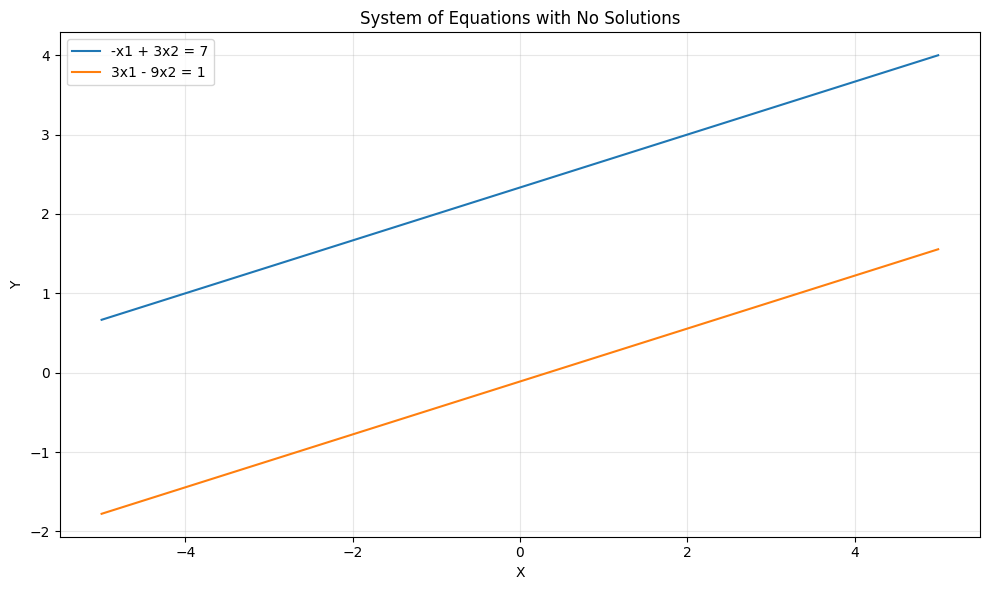

In [20]:
# Extract coefficients and constants from A_2_system
eq1_coeffs_2 = A_2_system[0, :2]
eq1_const_2 = A_2_system[0, 2]
eq2_coeffs_2 = A_2_system[1, :2]
eq2_const_2 = A_2_system[1, 2]

# Define a range of x values for plotting
x_values_2 = np.linspace(-5, 5, 100) # Adjust the range as needed

# Calculate corresponding y values for each equation
# Equation 1: -x1 + 3x2 = 7  =>  3x2 = x1 + 7  =>  x2 = (1/3)x1 + 7/3
# Handle the case where the coefficient for x2 is zero to avoid division by zero
if eq1_coeffs_2[1] != 0:
    y1_values_2 = (1/eq1_coeffs_2[1]) * (eq1_const_2 - eq1_coeffs_2[0] * x_values_2)
else:
    # If x2 coefficient is 0, the equation is -x1 = 7, which is a vertical line x1 = -7
    # This case needs special handling if we were to plot it, but based on the matrix A_2, this is not the case.
    # For the current A_2, eq1_coeffs_2[1] is 3, so this else block is not strictly necessary but included for robustness.
     y1_values_2 = np.full_like(x_values_2, np.nan) # Or handle as vertical line if needed


# Equation 2: 3x1 - 9x2 = 1  =>  -9x2 = -3x1 + 1  =>  x2 = (-3/-9)x1 + 1/-9 => x2 = (1/3)x1 - 1/9
# Handle the case where the coefficient for x2 is zero to avoid division by zero
if eq2_coeffs_2[1] != 0:
    y2_values_2 = (1/eq2_coeffs_2[1]) * (eq2_const_2 - eq2_coeffs_2[0] * x_values_2)
else:
     # If x2 coefficient is 0, handle as vertical line if needed
     y2_values_2 = np.full_like(x_values_2, np.nan) # Or handle as vertical line if needed


# Plot the lines
plot_lines([x_values_2, x_values_2], [y1_values_2, y2_values_2], labels=['-x1 + 3x2 = 7', '3x1 - 9x2 = 1'], title='System of Equations with No Solutions')

As expected, the lines of the two equations are parallel.

<a name='4'></a>
## 4 - System of Linear Equations with an Infinite Number of Solutions

By changing the free coefficients of the system $(2)$, you can bring it to consistency:

$$
\begin{cases}
-x_1+3x_2=7, \\ 3x_1-9x_2=-21, \end{cases}\tag{3}
$$

In [21]:
b_3 = np.array([7, -21], dtype=np.dtype(float))

Prepare the new matrix, corresponding to the system $(3)$:

In [22]:
A_3_system = np.hstack((A_2, b_3.reshape((2, 1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


Thus, from the corresponding linear system

$$
\begin{cases}
-x_1+3x_2=7, \\ 0=0, \end{cases}\tag{4}
$$

the solutions of the linear system $(3)$ are:

$$
x_1=3x_2-7, \tag{5}
$$

where $x_2$ is any real number.

If you plot the equations of the system, how many lines do you expect to see in the graph now? Check it using the code below:

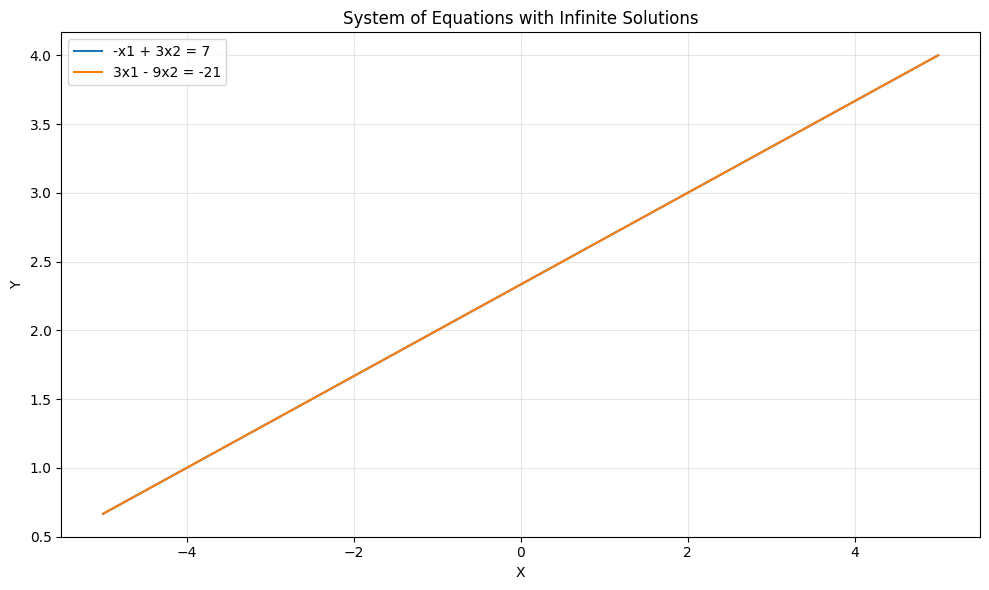

In [24]:
# Extract coefficients and constants from A_3_system
eq1_coeffs_3 = A_3_system[0, :2]
eq1_const_3 = A_3_system[0, 2]
eq2_coeffs_3 = A_3_system[1, :2]
eq2_const_3 = A_3_system[1, 2]

# Define a range of x values for plotting
x_values_3 = np.linspace(-5, 5, 100) # Adjust the range as needed

# Calculate corresponding y values for each equation
# Equation 1: -x1 + 3x2 = 7  =>  3x2 = x1 + 7  =>  x2 = (1/3)x1 + 7/3
# Handle the case where the coefficient for x2 is zero to avoid division by zero
if eq1_coeffs_3[1] != 0:
    y1_values_3 = (1/eq1_coeffs_3[1]) * (eq1_const_3 - eq1_coeffs_3[0] * x_values_3)
else:
    # If x2 coefficient is 0, handle as vertical line if needed
     y1_values_3 = np.full_like(x_values_3, np.nan)


# Equation 2: 3x1 - 9x2 = -21  =>  -9x2 = -3x1 - 21  =>  x2 = (-3/-9)x1 - 21/-9 => x2 = (1/3)x1 + 7/3
# Handle the case where the coefficient for x2 is zero to avoid division by zero
if eq2_coeffs_3[1] != 0:
    y2_values_3 = (1/eq2_coeffs_3[1]) * (eq2_const_3 - eq2_coeffs_3[0] * x_values_3)
else:
     # If x2 coefficient is 0, handle as vertical line if needed
     y2_values_3 = np.full_like(x_values_3, np.nan)


# Plot the lines
plot_lines([x_values_3, x_values_3], [y1_values_3, y2_values_3], labels=['-x1 + 3x2 = 7', '3x1 - 9x2 = -21'], title='System of Equations with Infinite Solutions')